In [88]:
#TODO fill in missing values using average and use cabin

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [89]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')


In [90]:
import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/test.csv
data/train.csv


In [91]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dennis, Mr. Samuel",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [93]:
train_data = train_data.drop(columns=['Cabin'])

In [94]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Dennis, Mr. Samuel",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [95]:
train_data = train_data.dropna(axis=0)

In [96]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [97]:
y = train_data['Survived']

features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex", "Embarked"]
X = train_data[features]

features_num = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
features_cat = ["Sex", "Embarked"]

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

### If you include name / ticket you get a input size of around 900, i think cause they aren't really categorical variables###

Input shape: [10]


In [98]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid'),
])

In [99]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Epoch 1/200
2/2 [==============================] - 1s 173ms/step - loss: 0.9684 - binary_accuracy: 0.4683 - val_loss: 0.6482 - val_binary_accuracy: 0.6236
Epoch 2/200
2/2 [==============================] - 0s 43ms/step - loss: 0.5569 - binary_accuracy: 0.7797 - val_loss: 0.6333 - val_binary_accuracy: 0.6742
Epoch 3/200
2/2 [==============================] - 0s 51ms/step - loss: 0.5412 - binary_accuracy: 0.7887 - val_loss: 0.6228 - val_binary_accuracy: 0.7135
Epoch 4/200
2/2 [==============================] - 0s 61ms/step - loss: 0.4957 - binary_accuracy: 0.7925 - val_loss: 0.6186 - val_binary_accuracy: 0.7247
Epoch 5/200
2/2 [==============================] - 0s 56ms/step - loss: 0.4738 - binary_accuracy: 0.7975 - val_loss: 0.6165 - val_binary_accuracy: 0.7247
Epoch 6/200
2/2 [==============================] - 0s 57ms/step - loss: 0.4924 - binary_accuracy: 0.8064 - val_loss: 0.6151 - val_binary_accuracy: 0.7416
Epoch 7/200
2/2 [==============================] - 0s 54ms/step - loss: 0.4

Epoch 54/200
2/2 [==============================] - 0s 34ms/step - loss: 0.3895 - binary_accuracy: 0.8235 - val_loss: 0.5425 - val_binary_accuracy: 0.8090
Epoch 55/200
2/2 [==============================] - 0s 38ms/step - loss: 0.3865 - binary_accuracy: 0.8462 - val_loss: 0.5496 - val_binary_accuracy: 0.8202
Epoch 56/200
2/2 [==============================] - 0s 37ms/step - loss: 0.3737 - binary_accuracy: 0.8279 - val_loss: 0.5560 - val_binary_accuracy: 0.8202
Epoch 57/200
2/2 [==============================] - 0s 36ms/step - loss: 0.3785 - binary_accuracy: 0.8291 - val_loss: 0.5622 - val_binary_accuracy: 0.8202
Epoch 58/200
2/2 [==============================] - 0s 35ms/step - loss: 0.3630 - binary_accuracy: 0.8494 - val_loss: 0.5696 - val_binary_accuracy: 0.8258
Epoch 59/200
2/2 [==============================] - 0s 35ms/step - loss: 0.3693 - binary_accuracy: 0.8475 - val_loss: 0.5717 - val_binary_accuracy: 0.8146
Epoch 60/200
2/2 [==============================] - 0s 37ms/step - los

<AxesSubplot:title={'center':'Accuracy'}>

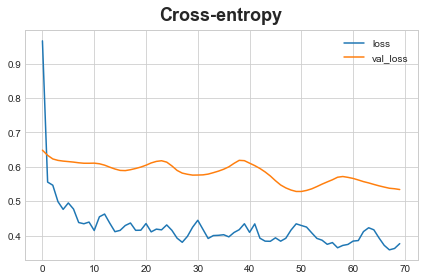

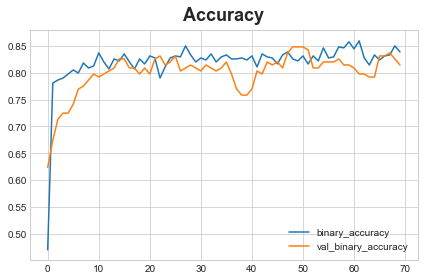

In [100]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [114]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

X_test = preprocessor.fit_transform(test_data[features])
test_input_shape = [X_test.shape[1]]

predictions = model.predict_classes(X_test)
predictions = np.concatenate(predictions)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('deep_learning_results.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/Users/sahilmahendrakar/Library/Python/3.8/lib/python/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
